In [23]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
from IPython.display import display, Image
import numpy as np
import pandas as pd
import os

In [24]:
import lvdatatools as lvdt

In [25]:
data_dir = '/Volumes/EDDropbox/Data/CNTAL17_q2/4K/'
fig_dir =  '/Volumes/EDDropbox/Data/CNTAL17_q2/figures/'
os.chdir(data_dir)

#CNTAL17_q2

This is a tunnel probe device. There are 3 Pd leads creating 2 quantum dots. On top of each dot is a ~100nm Al wire in a 4 probe configuration. Below is an image of the device as drawn in Illustrator.

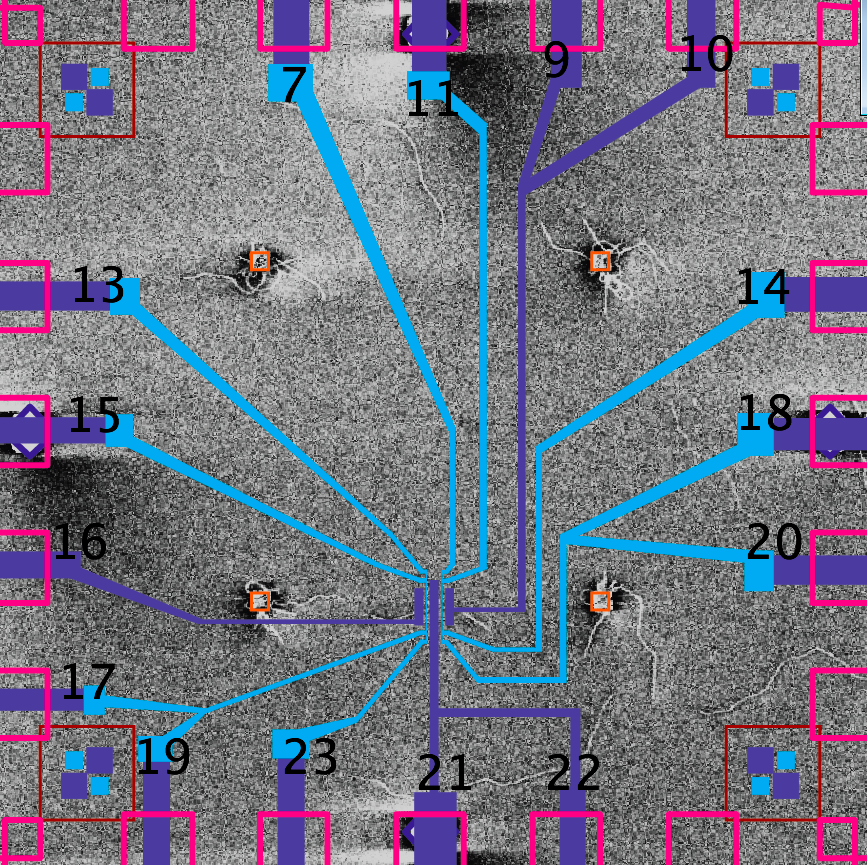

In [26]:
display(Image(os.path.join(fig_dir+'cntal17_q2.png'), width=500, height=500))

According to my notes, leads 11 and 18 are dead.

All of my file names will refer to what leads were connected. The general naming scheme is something like...

*measurement_high_low-gate_number.filetype*

High, low, and gate refer to the pins where the high and low bias voltage and gate voltage are connected. I will refer to the quantum dots as quantum dot left (QDL) and quantum dot right (QDR).

This sample was mounted in the Kelvinox 3 sample parallel field holder in the #3 spot (top).

## 4K DATA

In [27]:
os.listdir(data_dir)

['gateswp_16-21_8_a.bin',
 'vigate_21-10_8_c.txt',
 'gateswp_21-7_8_b.bin',
 'vigate_test_b.bin',
 'vigate_21-10_8_a.txt',
 'vigate_test_b.txt',
 'vigate_16-21_8_a.txt',
 'gateswp_16-21_8_a.txt',
 'vigate_21-7_8_a.txt',
 'vigate_21-10_8_b.txt',
 'vigate_21-19_8_b.txt',
 'vigate_21-19_8_b.bin',
 'gateswp_21-7_8_a.bin',
 'gateswp_21-10_8_a.txt',
 'vigate_21-10_8_a.bin',
 'gateswp_21-7_8_b.txt',
 'gateswp_21-16-19g_8_a.txt',
 'gateswp_21-16-19g_8_a.bin',
 'vigate_21-7_8_a.bin',
 'vigate_21-10_8_c.bin',
 'vigate_16-21_8_a.bin',
 'gateswp_21-7_8_a.txt',
 'vigate_test_a.bin',
 'vigate_16-21_8_b.bin',
 'vigate_test_a.txt',
 'vigate_21-10_8_b.bin',
 'gateswp_21-10_8_a.bin',
 'vigate_16-21_8_b.txt']

### Gate Dependence of QDL

The measured current as a funciton of gate voltage at fixed bias. This data was taken on leads 16-21, which correspond to the QD on the left in the image above.

In [28]:
#create a data frame with the appropriate column labels
qdl_gate_a = lvdt.get_data_2d(data_dir+'gateswp_16-21_8_a.bin')
qdl_gate_a.head() #check that the result looks right

,Size,Gate,Iavg,Istd,t0,dt
0,6,-10.000,2.194724e-09,1.975944e-09,0.516783,0.000023
1,6,-9.998,1.390325e-09,1.903098e-09,2.032408,0.000023
2,6,-9.996,1.365202e-09,1.896940e-09,3.532408,0.000023
3,6,-9.994,1.609586e-09,2.133470e-09,5.048033,0.000023
4,6,-9.992,1.543958e-09,1.863110e-09,6.548033,0.000023


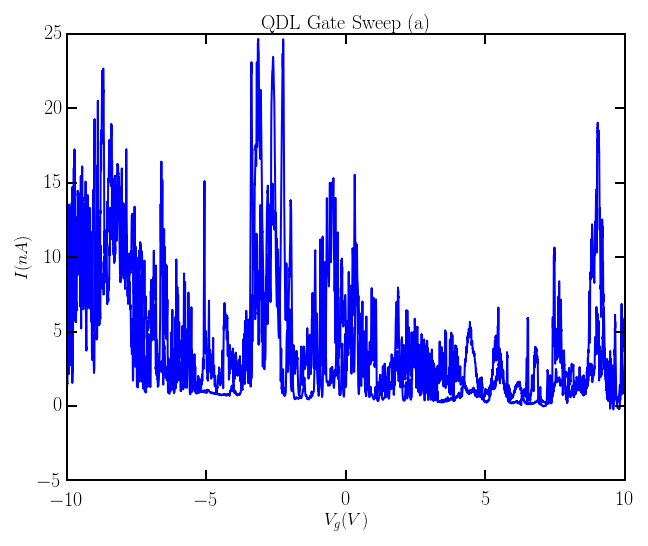

In [38]:
#plot raw data to get an idea of what's going on
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(qdl_gate_a['Gate'], qdl_gate_a['Iavg']*1e9, linewidth=2)
ax.set_title('QDL Gate Sweep (a)')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')

In [32]:
qdl_gate_a['dir'] = (qdl_gate_a['Gate']-qdl_gate_a['Gate'].shift()).fillna(0) #create a column representing sweep direction

In [33]:
#take a rolling mean of the gate data over 2 points
qdl_gate_a['Iavg'] = pd.rolling_mean(qdl_gate_a['Iavg'], 5)
qdl_gate_au = qdl_gate_a[qdl_gate_a['dir'] > 0]
qdl_gate_ad = qdl_gate_a[qdl_gate_a['dir'] < 0]

(-5, 25)

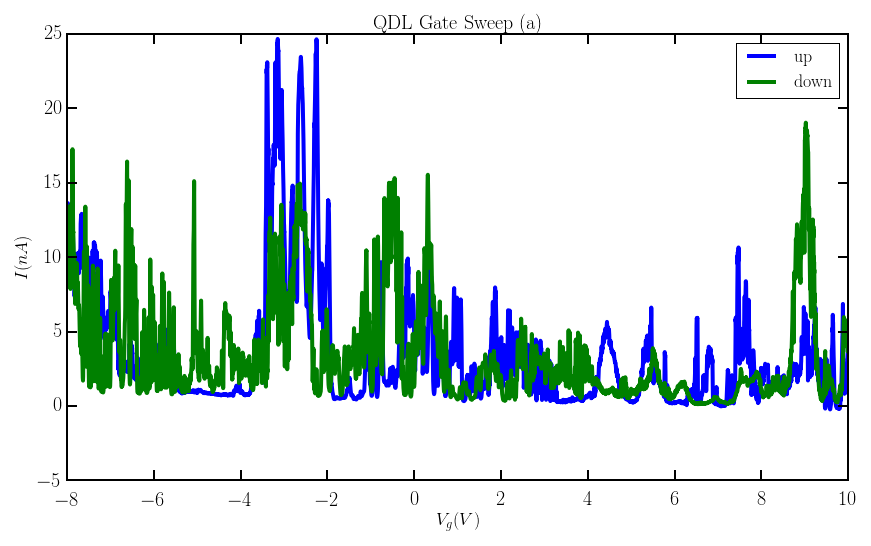

In [88]:
#plot both the up and down sweep
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.plot(qdl_gate_au['Gate'], qdl_gate_au['Iavg']*1e9, label='up')
ax.plot(qdl_gate_ad['Gate'], qdl_gate_ad['Iavg']*1e9, label='down')
ax.set_title('QDL Gate Sweep (a)')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.legend(loc='upper right', fontsize = 18)
ax.set_xlim([-8,10])
ax.set_ylim([-5,25])

All of the above data was taken with the Al lead on top of QDL floating. Out of curiousity, I grounded the Al wire and made the same gate sweep again.

In [40]:
qdl_gate_gnd = lvdt.get_data_2d(data_dir+'gateswp_21-16-19g_8_a.bin') #import data

In [41]:
qdl_gate_gnd['dir'] = (qdl_gate_gnd['Gate']-qdl_gate_gnd['Gate'].shift()).fillna(0) #create column for sweep direction

In [42]:
#rolling average and separate by sweep direction
qdl_gate_gnd['Iavg'] = pd.rolling_mean(qdl_gate_gnd['Iavg'], 2)
qdl_gate_gndu = qdl_gate_gnd[qdl_gate_gnd['dir'] > 0]
qdl_gate_gndd = qdl_gate_gnd[qdl_gate_gnd['dir'] < 0]

(-5, 25)

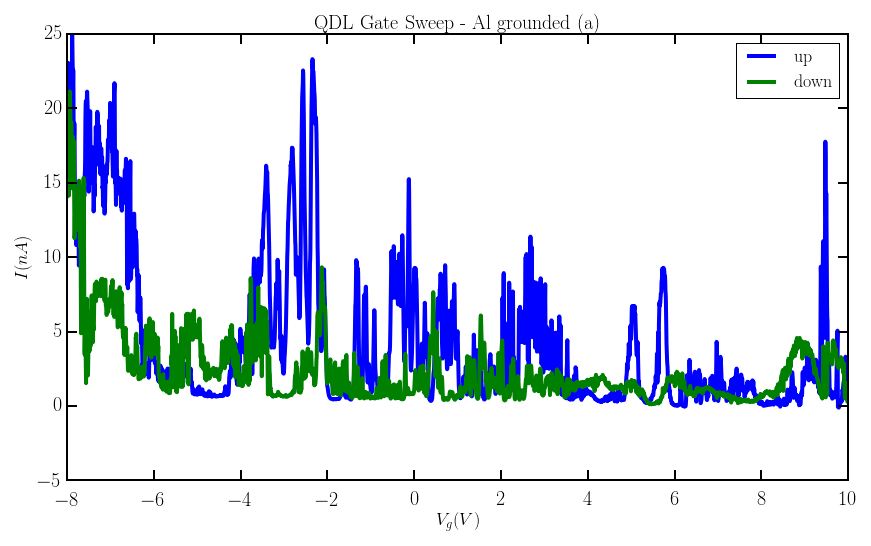

In [45]:
#plot both the up and down sweep
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.plot(qdl_gate_gndu['Gate'], qdl_gate_gndu['Iavg']*1e9, label='up')
ax.plot(qdl_gate_gndd['Gate'], qdl_gate_gndd['Iavg']*1e9, label='down')
ax.set_title('QDL Gate Sweep - Al grounded (a)')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.legend(loc='upper right', fontsize = 18)
ax.set_xlim([-8,10])
ax.set_ylim([-5,25])

### QDL Diamonds

The measured current as a funciton of bias and gate voltage. This data was again taken on leads 16-21.

In [46]:
qdl_vigate_b = lvdt.get_data_3d(data_dir+'vigate_16-21_8_b.bin')
qdl_vigate_b.head()

Gate,-4.0,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-1.59,-1.58,-1.57,-1.56,-1.55,-1.54,-1.53,-1.52,-1.51,-1.5
Bias,,,,,,,,,,,,,,,,,,,,,
0.0000,5.575086e-10,5.360864e-10,5.288831e-10,5.323795e-10,5.146402e-10,4.915206e-10,5.243797e-10,5.110729e-10,4.869412e-10,4.987445e-10,...,3.260779e-10,3.518147e-10,3.460162e-10,3.709421e-10,3.394454e-10,3.559905e-10,3.423897e-10,3.079086e-10,3.021291e-10,3.210136e-10
0.0001,6.679205e-10,5.812687e-10,7.300918e-10,6.921282e-10,6.819133e-10,6.580237e-10,7.418775e-10,6.996168e-10,6.851472e-10,7.957507e-10,...,3.375169e-10,4.073392e-10,3.618344e-10,4.072010e-10,3.548365e-10,3.848391e-10,4.184273e-10,5.047053e-10,6.654970e-10,8.328111e-10
0.0002,7.538819e-10,6.345342e-10,9.645647e-10,8.830767e-10,8.152144e-10,8.666092e-10,9.795441e-10,8.868985e-10,8.831257e-10,1.112053e-09,...,3.548453e-10,4.200815e-10,3.957077e-10,4.293552e-10,3.865459e-10,4.201071e-10,4.859385e-10,6.582446e-10,9.830207e-10,1.384437e-09
0.0003,9.783279e-10,6.668879e-10,1.233397e-09,1.004501e-09,9.981719e-10,1.037450e-09,1.142171e-09,1.093387e-09,1.110272e-09,1.424662e-09,...,3.711629e-10,4.278772e-10,4.133585e-10,4.369351e-10,4.119837e-10,4.504892e-10,5.370978e-10,7.741340e-10,1.273921e-09,1.755211e-09
0.0004,1.058889e-09,6.909837e-10,1.461658e-09,1.171317e-09,1.133267e-09,1.128333e-09,1.332652e-09,1.386188e-09,1.376393e-09,1.528820e-09,...,3.989686e-10,4.325956e-10,4.118235e-10,4.581730e-10,4.355435e-10,4.644250e-10,6.302970e-10,8.616743e-10,1.513557e-09,2.138775e-09


In [47]:
#group by/average bias
qdl_vigate_b = qdl_vigate_b.groupby(qdl_vigate_b.index).mean()
qdl_vigate_b.index = qdl_vigate_b.index*1000

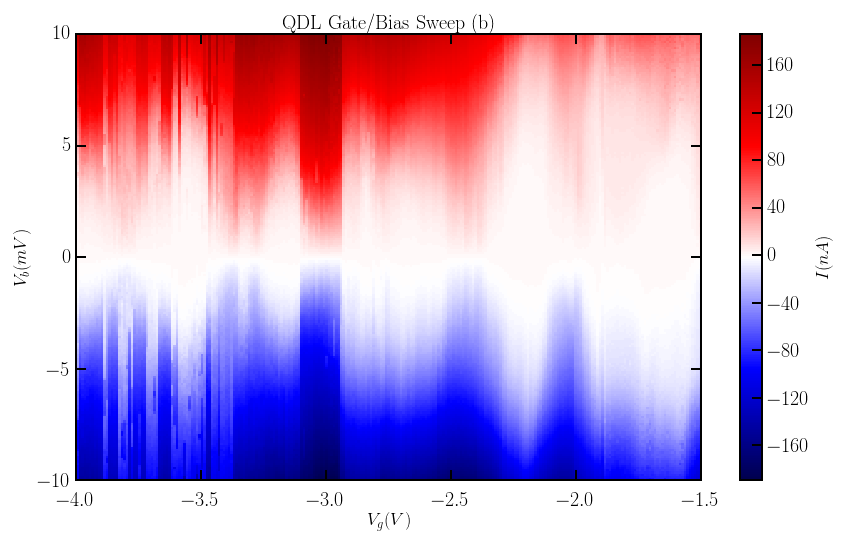

In [51]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(qdl_vigate_b)
im = ax.imshow(qdl_vigate_b*1e9, extent = limits, 
           cmap = plt.cm.seismic,
           origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_title('QDL Gate/Bias Sweep (b)')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')

In [55]:
#take the derivative and plot it
qdl_dvdigate_b = qdl_vigate_b.diff()/100e-6/3.875e-5
# qd1_dvdigate_b = qdl_dvdigate_b/qdl_dvdigate_b.mean()

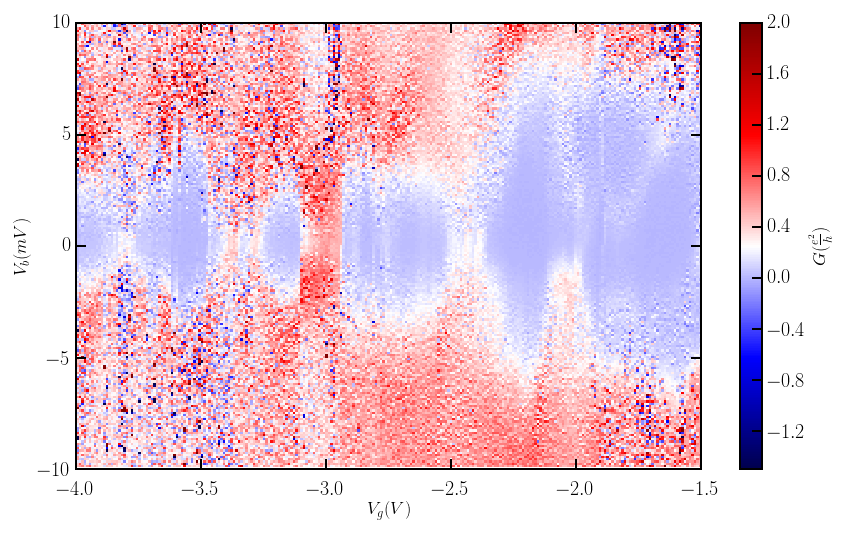

In [118]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(qdl_dvdigate_b)
im = ax.imshow(qdl_dvdigate_b, extent = limits, 
           cmap = plt.cm.seismic, vmin = -1.5, vmax = 2, 
           origin = 'lower', aspect = 'auto', interpolation = 'None')
#ax.set_title('QDL Gate/Bias Sweep (b)')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')
fig.savefig(os.path.join(fig_dir,'cntal17_qdl_diamonds.pdf'), format='pdf', dpi=300)

This is not great. It could be that I scanned a noisy region of the gate sweep. The up and down gate sweeps were pretty inconsistent.

###Tunnel Contact into QDL

The Al wire was grounded (19) and a bias voltage applied to the right contact of QDL (21). Current through the juction was measured as a function of bias and gate voltage.

In [71]:
qdl_tunnel_b = lvdt.get_data_3d(data_dir+'vigate_21-19_8_b.bin')

In [72]:
qdl_tunnel_b = qdl_tunnel_b.groupby(qdl_tunnel_b.index).mean()
qdl_tunnel_b.index = qdl_tunnel_b.index*1000
qdl_tunnel_b.head()

Gate,-4.0,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-1.59,-1.58,-1.57,-1.56,-1.55,-1.54,-1.53,-1.52,-1.51,-1.5
Bias,,,,,,,,,,,,,,,,,,,,,
-10.0,-2.098791e-11,-3.266872e-11,-2.022575e-12,-2.990730e-11,-4.028455e-11,-6.681160e-11,-5.275990e-11,-4.802686e-11,-5.210720e-11,-2.666065e-11,...,-1.230438e-10,-1.523165e-10,-1.196732e-10,-1.154605e-10,-1.217308e-10,-1.332517e-10,-1.163780e-10,-1.313763e-10,-1.745834e-10,-1.161948e-10
-9.9,-1.627501e-11,-2.348533e-11,-8.472311e-12,-3.396714e-11,-3.919526e-11,-6.100795e-11,-5.704243e-11,-4.262617e-11,-4.523109e-11,-3.477778e-11,...,-1.220913e-10,-1.561808e-10,-1.090521e-10,-1.272430e-10,-1.204290e-10,-1.265281e-10,-1.075196e-10,-1.240625e-10,-1.609142e-10,-1.057005e-10
-9.8,-1.797566e-11,-2.604270e-11,-1.150834e-11,-2.967692e-11,-3.760979e-11,-5.785749e-11,-5.149767e-11,-3.158308e-11,-3.826429e-11,-3.745181e-11,...,-1.115831e-10,-1.425777e-10,-1.114230e-10,-1.155878e-10,-9.855673e-11,-1.164244e-10,-1.061755e-10,-1.307057e-10,-1.601046e-10,-1.143881e-10
-9.7,-2.010889e-11,-1.523657e-11,4.167934e-12,-3.145474e-11,-2.914675e-11,-5.333545e-11,-5.415669e-11,-2.885714e-11,-3.604734e-11,-2.748448e-11,...,-1.056204e-10,-1.352508e-10,-1.141654e-10,-1.164478e-10,-1.130073e-10,-9.888473e-11,-9.835747e-11,-1.113360e-10,-1.573703e-10,-1.035918e-10
-9.6,-2.432104e-12,-1.100012e-11,5.472595e-12,-2.593593e-11,-1.497185e-11,-3.969732e-11,-4.844117e-11,-3.084922e-11,-2.458302e-11,-2.666578e-11,...,-1.025566e-10,-1.311503e-10,-1.076633e-10,-1.157980e-10,-1.069200e-10,-1.024473e-10,-9.205652e-11,-9.582973e-11,-1.499804e-10,-9.870961e-11


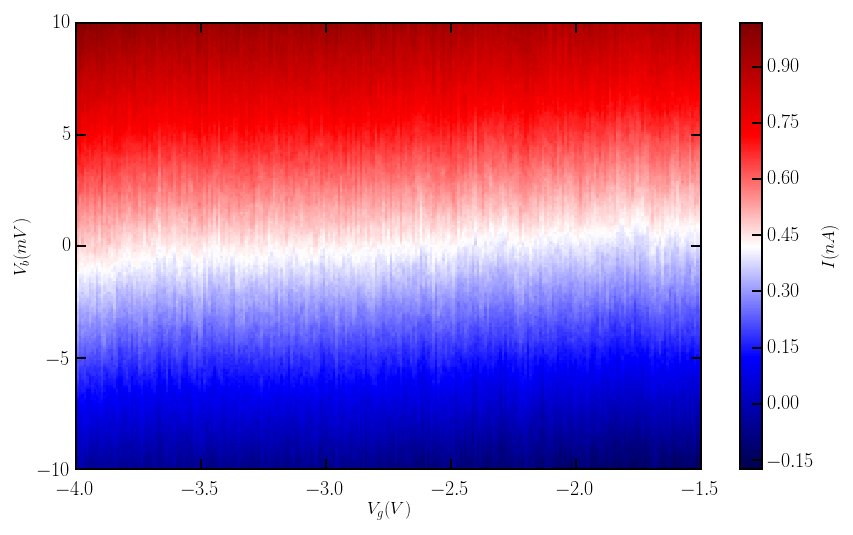

In [119]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(qdl_tunnel_b)
im = ax.imshow(qdl_tunnel_b*1e9, extent = limits, 
           cmap = plt.cm.seismic,
           origin = 'lower', aspect = 'auto', interpolation = 'None')
# ax.set_title('QDL Tunneling (b)')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')
fig.savefig(os.path.join(fig_dir,'cntal17_qdl_tunneling.pdf'), format='pdf', dpi=300)

In [75]:
#take the derivative and plot it
qdl_dtunnel_b = qdl_tunnel_b.diff()/100e-6/3.875e-5
qd1_dtunnel_b = qdl_dtunnel_b/qdl_dtunnel_b.mean()

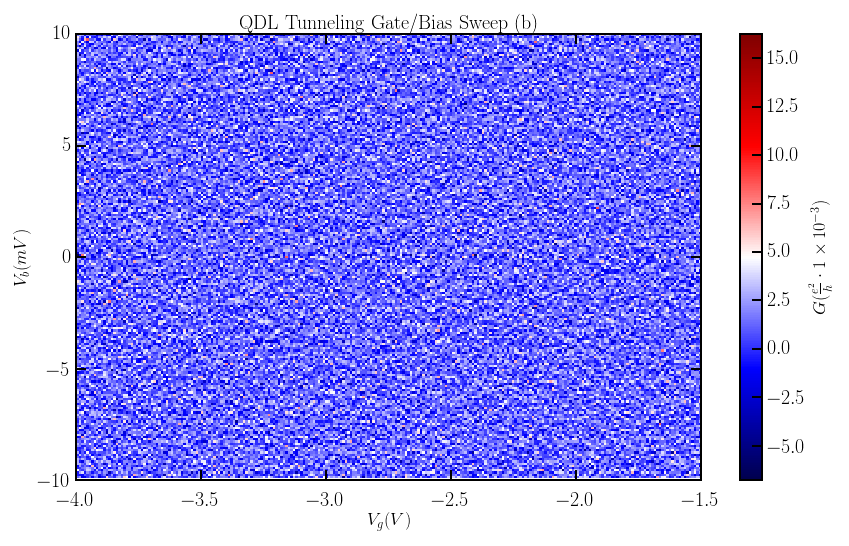

In [115]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(qdl_dtunnel_b)
im = ax.imshow(qdl_dtunnel_b*1e3, extent = limits, 
           cmap = plt.cm.seismic, #vmin = -0.02, vmax = 0.02, 
           origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_title('QDL Tunneling Gate/Bias Sweep (b)')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h} \cdot 1 \times 10^{-3})$')

That seems about right. For the record, this corresponds to about $20 M\Omega$ for the Al-CNT-Pd junction. Also, by looking at how the DC offset moves with the gate voltage, the Si-SiO2-CNT resistance is about $50 G\Omega$

### Gate Dependence of QDR

In [85]:
#create a data frame with the appropriate column labels
qdr_gate_a = lvdt.get_data_2d(data_dir+'gateswp_21-10_8_a.bin')
qdr_gate_a.head() #check that the result looks right

,Size,Gate,Iavg,Istd,t0,dt
0,6,-10.000,7.134716e-09,3.112758e-09,0.673033,0.000023
1,6,-9.995,4.838668e-09,1.558228e-09,2.094908,0.000023
2,6,-9.990,7.880650e-09,2.300714e-09,3.594908,0.000023
3,6,-9.985,3.252965e-09,1.624557e-09,5.001158,0.000023
4,6,-9.980,2.621354e-09,1.563013e-09,6.423033,0.000023


In [86]:
qdr_gate_a['dir'] = (qdr_gate_a['Gate']-qdr_gate_a['Gate'].shift()).fillna(0) #create column for sweep direction

In [87]:
#rolling average and separate by sweep direction
qdr_gate_a['Iavg'] = pd.rolling_mean(qdr_gate_a['Iavg'], 2)
qdr_gate_au = qdr_gate_a[qdr_gate_a['dir'] > 0]
qdr_gate_ad = qdr_gate_a[qdr_gate_a['dir'] < 0]

(-5, 25)

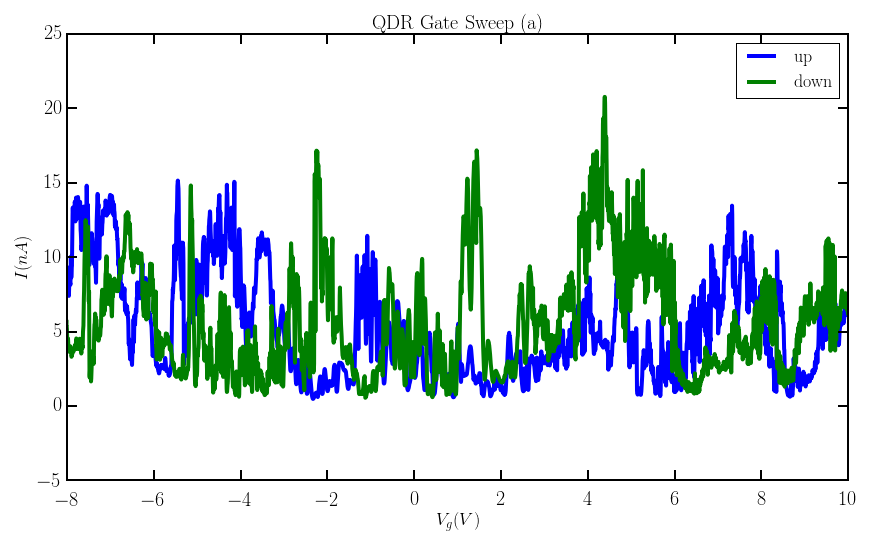

In [89]:
#plot both the up and down sweep
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.plot(qdr_gate_au['Gate'], qdr_gate_au['Iavg']*1e9, label='up')
ax.plot(qdr_gate_ad['Gate'], qdr_gate_ad['Iavg']*1e9, label='down')
ax.set_title('QDR Gate Sweep (a)')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.legend(loc='upper right', fontsize = 18)
ax.set_xlim([-8,10])
ax.set_ylim([-5,25])

###QDR Diamonds

In [90]:
qdr_vigate_c = lvdt.get_data_3d(data_dir+'vigate_21-10_8_c.bin')

In [92]:
#group by/average bias
qdr_vigate_c = qdr_vigate_c.groupby(qdr_vigate_c.index).mean()
qdr_vigate_c.index = qdr_vigate_c.index*1000
qdr_vigate_c.head()

Gate,0.0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,...,4.82,4.84,4.86,4.88,4.9,4.92,4.94,4.96,4.98,5.0
Bias,,,,,,,,,,,,,,,,,,,,,
-10.0,-7.227859e-08,-6.758371e-08,-6.761597e-08,-6.932976e-08,-6.961413e-08,-7.082758e-08,-6.942483e-08,-6.837215e-08,-6.895901e-08,-6.684428e-08,...,-9.702702e-08,-9.430503e-08,-8.350338e-08,-7.249178e-08,-6.650192e-08,-5.724141e-08,-5.047719e-08,-5.350280e-08,-5.681715e-08,-5.243126e-08
-9.9,-7.042475e-08,-6.625972e-08,-6.532827e-08,-6.694012e-08,-6.828325e-08,-6.967491e-08,-6.961314e-08,-6.776874e-08,-6.724125e-08,-6.567641e-08,...,-9.467453e-08,-9.323715e-08,-8.273269e-08,-7.137117e-08,-6.536196e-08,-5.614724e-08,-4.955092e-08,-5.077104e-08,-5.595981e-08,-5.228440e-08
-9.8,-6.866960e-08,-6.375311e-08,-6.319731e-08,-6.610263e-08,-6.582602e-08,-6.716853e-08,-6.686725e-08,-6.792548e-08,-6.581389e-08,-6.408159e-08,...,-9.280558e-08,-9.248798e-08,-8.116667e-08,-7.059960e-08,-6.433685e-08,-5.524864e-08,-4.852938e-08,-4.983186e-08,-5.527039e-08,-5.083410e-08
-9.7,-6.729205e-08,-6.248399e-08,-6.149012e-08,-6.352523e-08,-6.443766e-08,-6.509127e-08,-6.446903e-08,-6.447211e-08,-6.444589e-08,-6.212688e-08,...,-9.041658e-08,-9.167519e-08,-7.984047e-08,-6.960020e-08,-6.330651e-08,-5.406854e-08,-4.749114e-08,-4.874432e-08,-5.422110e-08,-5.015601e-08
-9.6,-6.553769e-08,-6.148553e-08,-5.995382e-08,-6.130788e-08,-6.379209e-08,-6.320560e-08,-6.403520e-08,-6.256771e-08,-6.191817e-08,-6.063171e-08,...,-8.922768e-08,-8.959937e-08,-7.854367e-08,-6.836860e-08,-6.213151e-08,-5.307757e-08,-4.658290e-08,-4.741279e-08,-5.289392e-08,-4.937581e-08


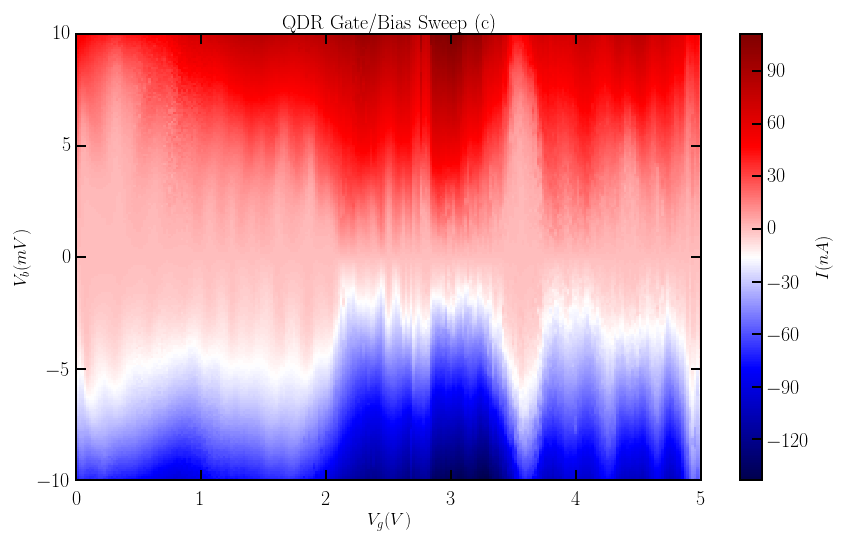

In [93]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(qdr_vigate_c)
im = ax.imshow(qdr_vigate_c*1e9, extent = limits, 
           cmap = plt.cm.seismic,
           origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_title('QDR Gate/Bias Sweep (c)')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')

In [95]:
#take the derivative and plot it
qdr_dvdigate_c = qdr_vigate_c.diff()/100e-6/3.875e-5

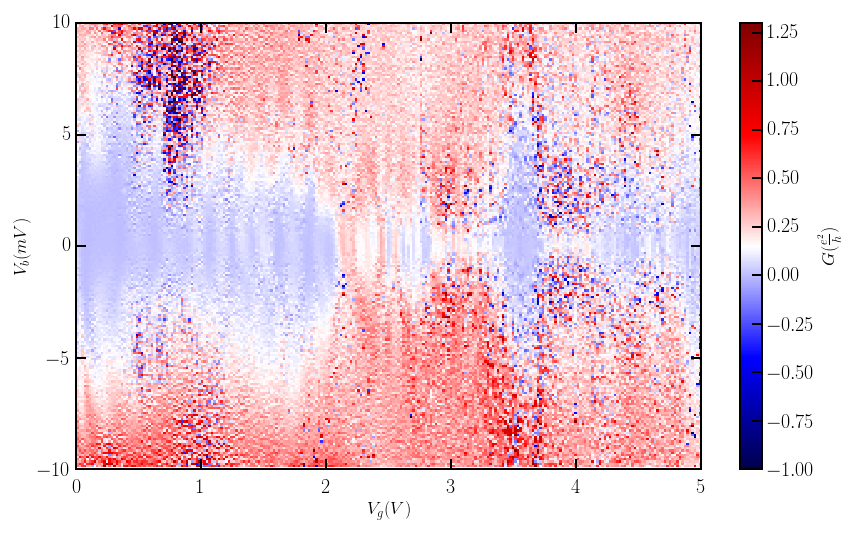

In [120]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(qdr_dvdigate_c)
im = ax.imshow(qdr_dvdigate_c, extent = limits, 
           cmap = plt.cm.seismic, vmin = -1., vmax = 1.3, 
           origin = 'lower', aspect = 'auto', interpolation = 'None')
# ax.set_title('QDR Gate/Bias Sweep (b)')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')
fig.savefig(os.path.join(fig_dir,'cntal17_qdr_diamonds.pdf'), format='pdf', dpi=300)

###Tunnel Contact into QDR

In [107]:
qdr_gt_b = lvdt.get_data_2d(data_dir+'gateswp_21-7_8_b.bin') #gt = gate tunneling

In [108]:
qdr_gt_b['dir'] = (qdr_gt_b['Gate']-qdr_gt_b['Gate'].shift()).fillna(0) #create column for sweep direction

In [109]:
#rolling average and separate by sweep direction
qdr_gt_b['Iavg'] = pd.rolling_mean(qdr_gt_b['Iavg'], 2)
qdr_gt_bu = qdr_gt_b[qdr_gt_b['dir'] > 0]
qdr_gt_bd = qdr_gt_b[qdr_gt_b['dir'] < 0]

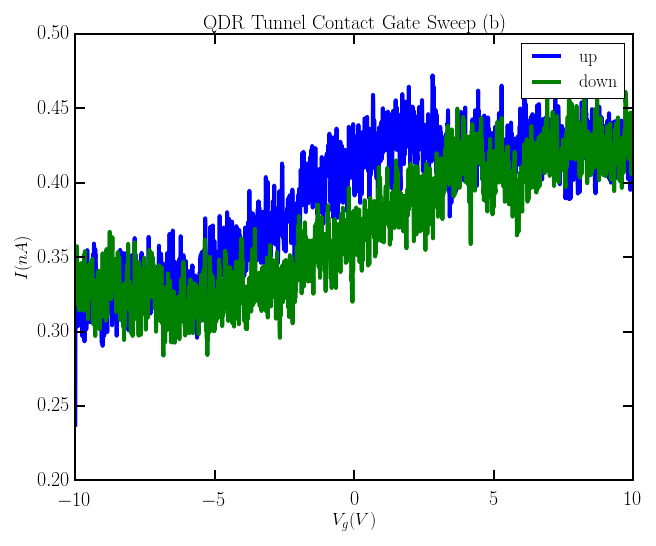

In [110]:
#plot both the up and down sweep
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(qdr_gt_bu['Gate'], qdr_gt_bu['Iavg']*1e9, label='up')
ax.plot(qdr_gt_bd['Gate'], qdr_gt_bd['Iavg']*1e9, label='down')
ax.set_title('QDR Tunnel Contact Gate Sweep (b)')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.legend(loc='upper right', fontsize = 18)
#ax.set_xlim([-8,10])
#ax.set_ylim([-5,25])

In [111]:
qdr_tunnel_a = lvdt.get_data_3d(data_dir+'vigate_21-7_8_a.bin')
qdr_tunnel_a = qdr_tunnel_a.groupby(qdr_tunnel_a.index).mean()

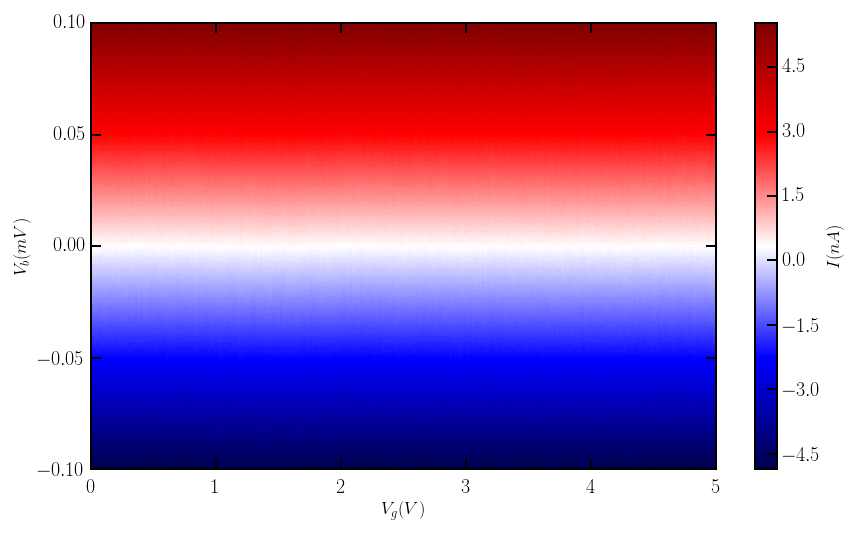

In [122]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(qdr_tunnel_a)
im = ax.imshow(qdr_tunnel_a*1e9, extent = limits, 
           cmap = plt.cm.seismic,
           origin = 'lower', aspect = 'auto', interpolation = 'None')
# ax.set_title('QDR Tunneling (a)')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')
fig.savefig(os.path.join(fig_dir,'cntal17_qdr_tunneling.pdf'), format='pdf', dpi=300)

In [113]:
#take the derivative and plot it
qdr_dtunnel_a = qdr_tunnel_a.diff()/100e-6/3.875e-5

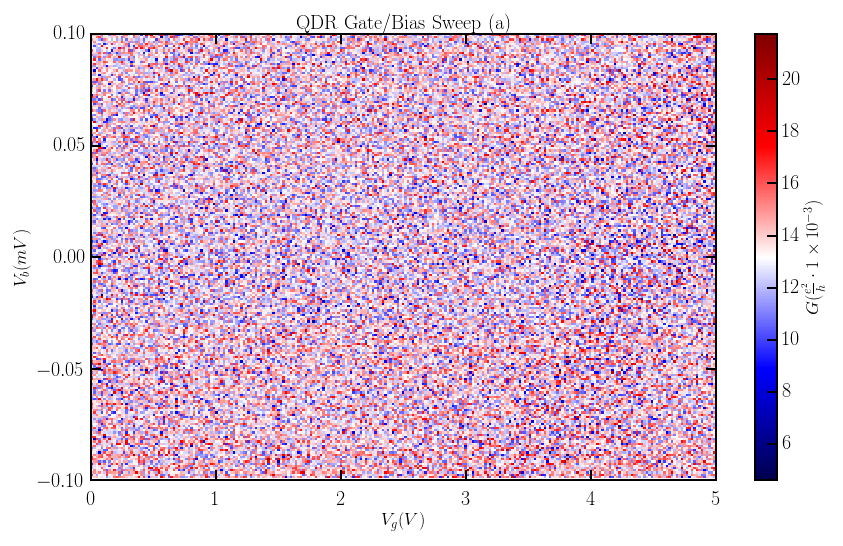

In [114]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(qdr_dtunnel_a)
im = ax.imshow(qdr_dtunnel_a*1e3, extent = limits, 
           cmap = plt.cm.seismic, #vmin = -2, vmax = 4, 
           origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_title('QDR Gate/Bias Sweep (a)')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h} \cdot 1 \times 10^{-3})$')

This tunnel (?) contact is also $20 M\Omega$. That makes me suspicious that this measurement has nothing to do with the sample and is actual a leakage current in an op-amp in my current-voltage amp. $20 M\Omega$ is about on the order of typical op-amp impedances and the resistance between parallel traces on pc boards. I can probably check this somehow...

The impedance of the current-voltage amp seems to be about $200 M\Omega$. That was measured in a few different configurations.

That makes me think there is some conduction on the chip, but I am starting to doubt that it is through the nanotube. I think it's more likely Al-SiO2-Pd that I'm measuring. 